In [5]:
!pip3 install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
from PIL import Image
import cv2 as cv

In [4]:
# Read the image
img = pydicom.dcmread('E:\\Important Documents\\Programming\\DigitalImageProcessing\\PD_Analysis\\DaTscan_2\\Dat_HC\\PPMI\\3554\\Reconstructed_DaTSCAN\\2012-03-28_13_59_56.0\\I358138\\PPMI_3554_NM_Reconstructed_DaTSCAN_Br_20130206130856874_1_S151495_I358138.dcm')

# Convert the image into pixel array of type float
img_array = img.pixel_array.astype(float)

# Rescale pixel values
rescaled_image = (np.maximum(img_array, 0) / img_array.max()) * 255

# Convert to uint8
transformed_image = np.uint8(rescaled_image)

# Manually set the slice index
slice_index = 42  # Set the desired slice number here

# Ensure the slice index is within bounds
if slice_index < 0 or slice_index >= transformed_image.shape[0]:
    raise ValueError("Invalid slice index")

# Select the specified slice
slice_image = transformed_image[slice_index, :, :]

# Create image from the selected slice
final_image = Image.fromarray(slice_image)
final_image.show()
final_image.save('JPG_images/3754_42.png')

(109, 91)


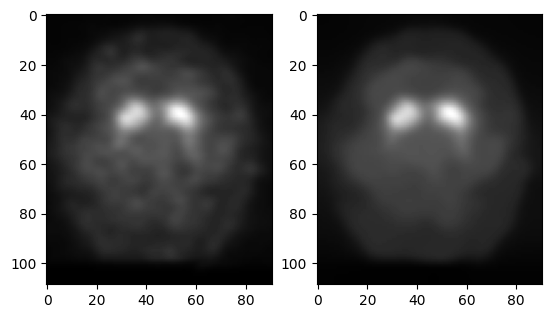

In [19]:
img = cv.imread('JPG_images/3754_37.png', cv.IMREAD_GRAYSCALE)
print(img.shape)  # Print the shape of the image

# Apply the denoising function
dst = cv.fastNlMeansDenoising(img, None, h=10, searchWindowSize=21, templateWindowSize=7)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(dst, cmap='gray')
plt.show()